In [176]:
import numpy as np
import torch as tc
import matplotlib.pyplot as plt
import pickle
from scipy import stats

# Read files

In [137]:
with open('../data/huge_results.pkl', 'rb') as f:
    meta = pickle.load(f)

In [138]:
runs = meta[0,0,:,0]

In [139]:
runs = [r[0] for r in runs]

In [140]:
run_means = [r.mean() for r in runs]
run_stds = [r.std() for r in runs]

In [141]:
run_means
run_stds

[tensor(0.7717),
 tensor(0.9623),
 tensor(0.7993),
 tensor(0.8230),
 tensor(0.8978),
 tensor(0.8811),
 tensor(0.8552),
 tensor(0.8226),
 tensor(0.8759)]

(array([  7.,   9.,  15.,  29.,  55.,  94., 106., 129., 187., 107., 105.,
        214., 159., 179., 104., 114.,  33.,  19.,  11.,  24.]),
 array([5.00783634, 5.24429846, 5.4807601 , 5.71722221, 5.95368385,
        6.19014597, 6.42660809, 6.66306973, 6.89953184, 7.13599348,
        7.3724556 , 7.60891771, 7.84537935, 8.08184147, 8.31830311,
        8.5547657 , 8.79122734, 9.02768898, 9.26415062, 9.50061321,
        9.73707485]),
 <BarContainer object of 20 artists>)

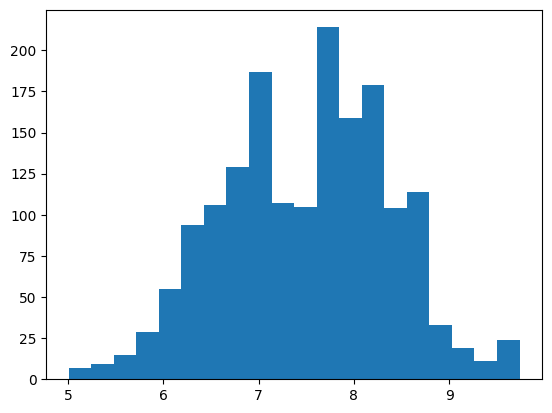

In [142]:
plt.hist(runs[8], bins=20)

In [222]:
def getkl(data):
    data, _ = data.sort()
    px = [sum(data < x)/len(data) for x in data[1:]]
    qx = tc.distributions.Normal(7.25, 0.9129).cdf(data[1:])
    kl = [px[i]*tc.log(px[i]/qx[i]) for i in range(len(data)-1)]
    return sum(kl)

In [230]:
kl_result = [getkl(r) for r in runs]

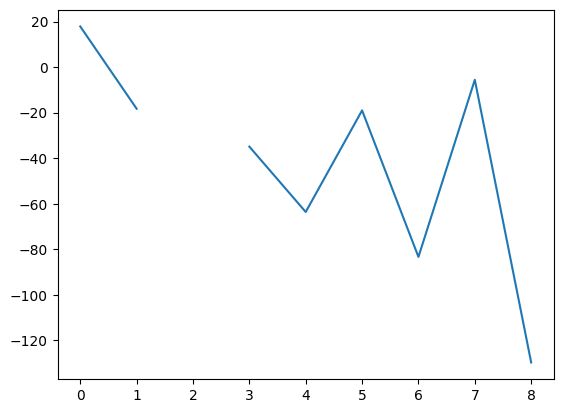

In [235]:
plt.plot(kl_result)

# Runs

In [822]:
with open('../data/1211-1812_smc_moreruns/results.pkl', 'rb') as f:
    meta = pickle.load(f)

In [823]:
meta.shape

(1, 1, 105, 1)

In [824]:
runs = meta[0,0,:,0]

In [825]:
run_samples = [r[0] for r in runs]
run_ess = [r[1] for r in runs]
run_time = [r[2] for r in runs]

In [827]:
run_time = np.asarray(run_time)
run_time = run_time.reshape(15, 7)

In [828]:
run_time

array([[ 2.33892512,  6.87765789, 11.57328677, 16.33349395, 20.97931004,
        25.94383264, 31.48505688],
       [ 2.25612903,  6.88752007, 11.49280882, 16.41234207, 21.01000094,
        26.00767183, 30.98504591],
       [ 2.26197505,  6.86739588, 11.61036491, 16.23117805, 20.83437324,
        25.85679793, 30.92345977],
       [ 2.23555398,  6.99811411, 11.652215  , 16.13956809, 21.03503895,
        25.59158611, 30.97779703],
       [ 2.23414993,  6.88058496, 11.62767291, 16.19959593, 21.2345891 ,
        25.79121113, 31.10442805],
       [ 2.18858504,  6.8046217 , 11.77930331, 16.71894693, 21.36825085,
        26.80543113, 31.43975687],
       [ 2.18024611,  6.84102106, 11.66588593, 16.64780903, 21.252985  ,
        26.02688193, 31.206249  ],
       [ 2.24529815,  6.84840894, 11.53138804, 16.49418092, 21.21453595,
        26.09732795, 30.53109598],
       [ 2.20790696,  6.94370699, 11.680758  , 16.33983994, 20.82498622,
        25.89041877, 30.55053806],
       [ 2.23971915,  6.8247

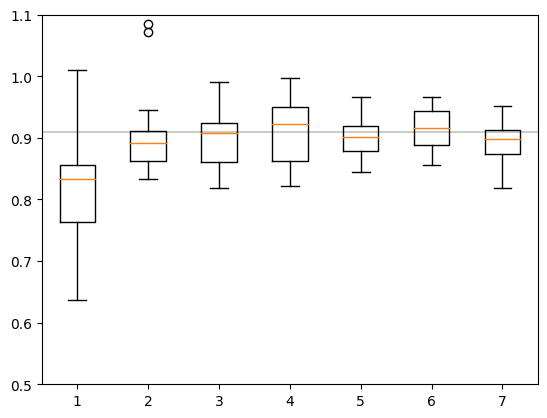

In [829]:
run_sds = [r.std() for r in run_samples]
run_sds = np.asarray(run_sds)
run_sds = run_sds.reshape(15,7)
plt.boxplot(run_sds, whis = 2)
plt.ylim([0.5, 1.1])
xmin, xmax = plt.xlim()
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()
plt.close()

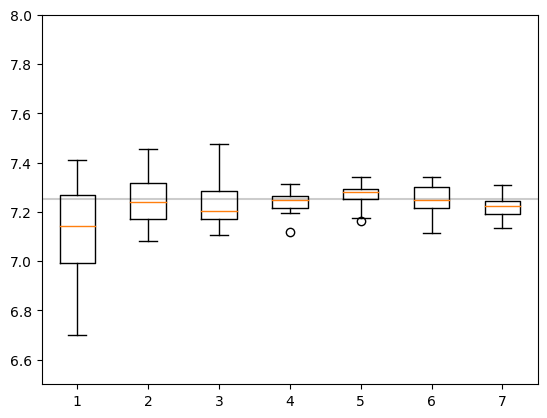

In [831]:
run_means = [r.mean() for r in run_samples]
run_means = np.asarray(run_means)
run_means = run_means.reshape(15,7)
plt.boxplot(run_means, whis=2)
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.ylim([6.5, 8])
plt.show()
plt.close()

In [832]:
plt.boxplot(tc.t(tc.tensor(run_ess)))
plt.xlabel("Number of Observe")
plt.ylabel("Fractional ESS")
plt.title("SMC Fractional ESS on each Observe")
plt.ylim([0, 0.5])
plt.tight_layout()

RuntimeError: Could not infer dtype of NoneType

In [1029]:
with open('../data/1218-1615/results.pkl', 'rb') as f:
    meta_rej = pickle.load(f)

In [1030]:
runs = meta_rej[0,0,:,0]

In [1031]:
meta_rej.shape

(1, 1, 140, 1)

In [1032]:
rej_samples = [r[0] for r in runs]
rej_ess = [r[1] for r in runs]
rej_times = [r[-1] for r in runs]

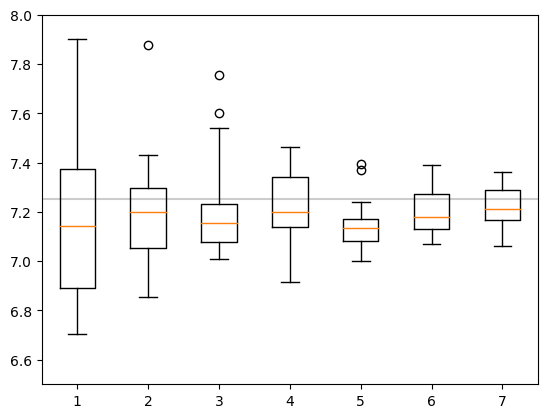

In [1033]:
rej_means = [r.mean() for r in rej_samples]
rej_means = np.asarray(rej_means)
rej_means = rej_means.reshape(20,7)
plt.boxplot(rej_means, whis=2)
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.ylim([6.5, 8])
plt.show()
plt.close()

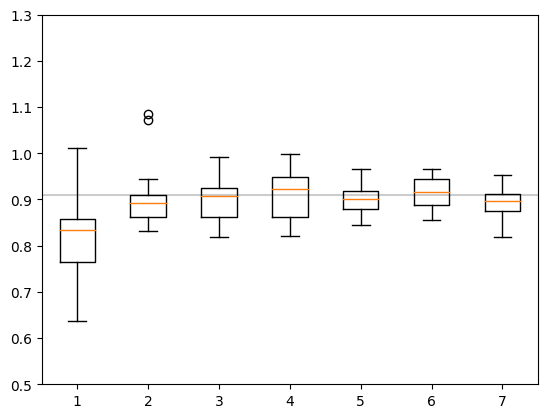

In [1034]:
rej_sds = [r.std() for r in rej_samples]
rej_sds = np.asarray(rej_sds)
rej_sds = rej_sds.reshape(20, 7)
plt.boxplot(run_sds, whis = 2)
xmin, xmax = plt.xlim()
plt.ylim([0.5, 1.3])
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()
plt.close()

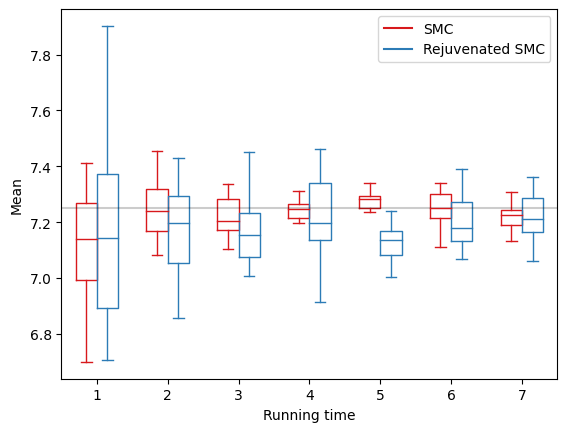

In [1035]:
p1 = run_means
p2 = rej_means

ticks = range(1, (len(p1)+1))
ticks = [str(tick) for tick in ticks]


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(p1, whis= 1.5, positions=np.array(range(7))*2.0-0.3, sym='', widths=0.6)
bpr = plt.boxplot(p2, whis= 1.5, positions=np.array(range(7))*2.0+0.3, sym='', widths=0.6)


set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='SMC')
plt.plot([], c='#2C7BB6', label=
         'Rejuvenated SMC')
plt.legend()
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, 13)
plt.xlabel("Running time")
plt.ylabel("Mean")
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.show()

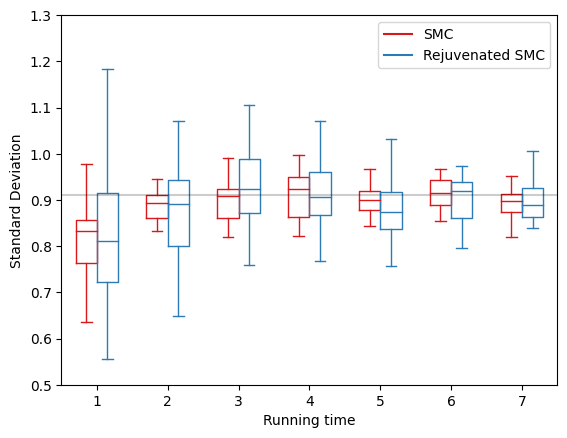

In [1036]:
p1 = run_sds
p2 = rej_sds

ticks = range(1, (len(p1)+1))
ticks = [str(tick) for tick in ticks]


def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

bpl = plt.boxplot(p1, positions=np.array(range(7))*2.0-0.3, sym='', widths=0.6)
bpr = plt.boxplot(p2, positions=np.array(range(7))*2.0+0.3, sym='', widths=0.6)


set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')


plt.plot([], c='#D7191C', label='SMC')
plt.plot([], c='#2C7BB6', label=
         'Rejuvenated SMC')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlim(-1, 13)
plt.ylim(0.5, 1.3)
plt.xlabel("Running time")
plt.ylabel("Standard Deviation")
xmin, xmax = plt.xlim()
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.show()

In [1078]:
with open('../data/1218-1439_postrej_num_rej/results.pkl', 'rb') as f:
    rej_com = pickle.load(f)

In [1079]:
rej_com.shape

(1, 1, 1, 90)

In [1074]:
rej_com = rej_com[0,0,0,:]
rejsamples = [d[0] for d in rej_com]
rejmean = [d.mean() for d in rejsamples]
rej_mean = np.asarray(rejmean)
rej_mean = rej_mean.reshape(10, 9)

Text(0, 0.5, 'Mean')

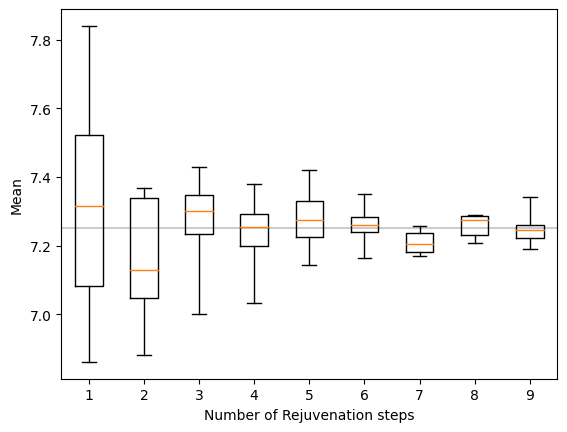

In [1075]:
plt.boxplot(rej_mean, whis=5)
xmin, xmax = plt.xlim()
plt.hlines(7.25, xmin, xmax, color="black", alpha=0.2)
plt.xlabel("Number of Rejuvenation steps")
plt.ylabel("Mean")

In [1076]:
rejsd = [d.std() for d in rejsamples]
rej_sd = np.asarray(rejsd)
rej_sd = rej_sd.reshape(10, 9)

Text(0, 0.5, 'Standard Deviation')

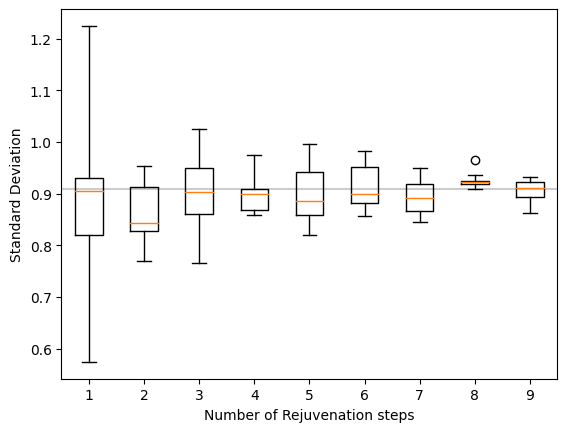

In [1077]:
plt.boxplot(rej_sd, whis = 3)
xmin, xmax = plt.xlim()
plt.hlines(0.91, xmin, xmax, color="black", alpha=0.2)
plt.xlabel("Number of Rejuvenation steps")
plt.ylabel("Standard Deviation")